In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Tidytuesday May 9, 2023: US Childcare Cost

In [2]:
childcare = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-05-09/childcare_costs.csv")
childcare.shape

(34567, 61)

In [3]:
childcare.head()

,county_fips_code,study_year,unr_16,funr_16,munr_16,unr_20to64,funr_20to64,munr_20to64,flfpr_20to64,flfpr_20to64_under6,...,memp_p,femp_p,mcsa,mfccsa,mc_infant,mc_toddler,mc_preschool,mfcc_infant,mfcc_toddler,mfcc_preschool
0,1001,2008,5.42,4.41,6.32,4.6,3.5,5.6,68.9,66.9,...,21.55,4.07,80.92,81.40,104.95,104.95,85.92,83.45,83.45,81.40
1,1001,2009,5.93,5.72,6.11,4.8,4.6,5.0,70.8,63.7,...,21.96,5.19,83.42,85.68,105.11,105.11,87.59,87.39,87.39,85.68
2,1001,2010,6.21,5.57,6.78,5.1,4.6,5.6,71.3,67.0,...,21.28,4.13,85.92,89.96,105.28,105.28,89.26,91.33,91.33,89.96
3,1001,2011,7.55,8.13,7.03,6.2,6.3,6.1,70.2,66.5,...,22.80,4.77,88.43,94.25,105.45,105.45,90.93,95.28,95.28,94.25
4,1001,2012,8.60,8.88,8.29,6.7,6.4,7.0,70.6,67.1,...,22.88,4.84,90.93,98.53,105.61,105.61,92.60,99.22,99.22,98.53


In [4]:
childcare.columns

Index(['county_fips_code', 'study_year', 'unr_16', 'funr_16', 'munr_16',
       'unr_20to64', 'funr_20to64', 'munr_20to64', 'flfpr_20to64',
       'flfpr_20to64_under6', 'flfpr_20to64_6to17',
       'flfpr_20to64_under6_6to17', 'mlfpr_20to64', 'pr_f', 'pr_p', 'mhi_2018',
       'me_2018', 'fme_2018', 'mme_2018', 'total_pop', 'one_race',
       'one_race_w', 'one_race_b', 'one_race_i', 'one_race_a', 'one_race_h',
       'one_race_other', 'two_races', 'hispanic', 'households',
       'h_under6_both_work', 'h_under6_f_work', 'h_under6_m_work',
       'h_under6_single_m', 'h_6to17_both_work', 'h_6to17_fwork',
       'h_6to17_mwork', 'h_6to17_single_m', 'emp_m', 'memp_m', 'femp_m',
       'emp_service', 'memp_service', 'femp_service', 'emp_sales',
       'memp_sales', 'femp_sales', 'emp_n', 'memp_n', 'femp_n', 'emp_p',
       'memp_p', 'femp_p', 'mcsa', 'mfccsa', 'mc_infant', 'mc_toddler',
       'mc_preschool', 'mfcc_infant', 'mfcc_toddler', 'mfcc_preschool'],
      dtype='object')

In [3]:
# select columns that contain "emp" (i.e. employment data) in their column name
emp_df = childcare.filter(items=['county_fips_code', 'study_year'] + [col for col in childcare.columns if 'emp' in col])


In [4]:
counties = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-05-09/counties.csv")

In [5]:
# merge emp_df and countries on county_fips_code column
merged_df = pd.merge(counties,emp_df, on='county_fips_code')
# drop county_fips_code and state_abbreviation columns
merged_df = merged_df.drop(['county_fips_code', 'state_abbreviation'], axis=1)


In [8]:
merged_df.head()

,county_name,state_name,study_year,emp_m,memp_m,femp_m,emp_service,memp_service,femp_service,emp_sales,memp_sales,femp_sales,emp_n,memp_n,femp_n,emp_p,memp_p,femp_p
0,Autauga County,Alabama,2008,27.40,24.41,30.68,17.06,15.53,18.75,29.11,15.97,43.52,13.21,22.54,2.99,13.22,21.55,4.07
1,Autauga County,Alabama,2009,29.54,26.07,33.40,15.81,14.16,17.64,28.75,17.51,41.25,11.89,20.30,2.52,14.02,21.96,5.19
2,Autauga County,Alabama,2010,29.33,25.94,33.06,16.92,15.09,18.93,29.07,17.82,41.43,11.57,19.86,2.45,13.11,21.28,4.13
3,Autauga County,Alabama,2011,31.17,26.97,35.96,16.18,14.21,18.42,27.56,17.74,38.76,10.72,18.28,2.09,14.38,22.80,4.77
4,Autauga County,Alabama,2012,32.13,28.59,36.09,16.09,14.71,17.63,28.39,17.79,40.26,9.02,16.03,1.19,14.37,22.88,4.84


In [6]:
# assuming you have a pandas dataframe named 'childcare'
emp_rate_df = (childcare
               .loc[:, ['study_year', 'emp_m','memp_m','emp_n','emp_sales','emp_service','femp_m']]
               .groupby('study_year')
               .mean()
               .reset_index()
              )



In [10]:
emp_rate_df.head()

,study_year,emp_m,memp_m,emp_n,emp_sales,emp_service,femp_m
0,2008,29.980617,26.670293,13.809742,22.614624,17.053208,33.757798
1,2009,29.614655,25.921661,13.772440,22.864400,17.343099,33.858673
2,2010,30.092148,26.253143,13.502348,22.796675,17.540875,34.452262
3,2011,30.386844,26.371899,13.290178,22.687763,17.811075,34.921604
4,2012,30.502676,26.342008,13.106271,22.589710,18.076284,35.180601


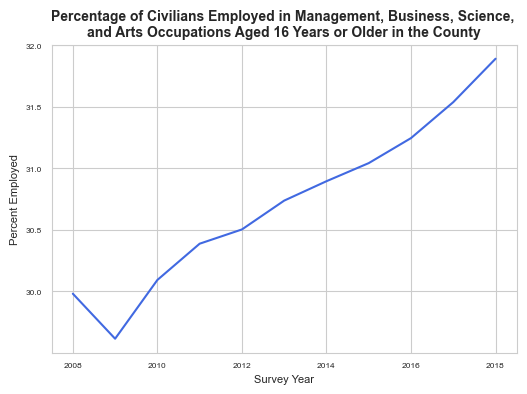

In [21]:
sns.set_style('whitegrid')
plt.figure(figsize=(6, 4))
sns.lineplot(x='study_year', y='emp_m', data=emp_rate_df, color='royalblue')
plt.title('Percentage of Civilians Employed in Management, Business, Science, \nand Arts Occupations Aged 16 Years or Older in the County', fontsize=10, fontweight='bold')
plt.xlabel('Survey Year', fontsize=8)
plt.ylabel('Percent Employed', fontsize=8)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.show()

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(6, 4))
sns.lineplot(x='study_year', y='memp_m', data=emp_rate_df, color='royalblue')
plt.title('Percent of male civilians employed in management, business, science,\n and arts occupations aged 16 years old or older in the county', fontsize=10, fontweight='bold')
plt.xlabel('Survey Year', fontsize=8)
plt.ylabel('Percent Employed', fontsize=8)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.show()

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(6, 4))
sns.lineplot(x='study_year', y='emp_n', data=emp_rate_df, color='royalblue')
plt.title('Percent of civilians employed in natural resources, construction, and maintenance occupations\n aged 16 years old and older in the county.', fontsize=10, fontweight='bold')
plt.xlabel('Survey Year', fontsize=8)
plt.ylabel('Percent Employed', fontsize=8)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.show()

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(6, 4))
sns.lineplot(x='study_year', y='emp_sales', data=emp_rate_df, color='royalblue')
plt.title('Percentage of civilians employed in sales and office occupations\n aged 16 years old and older in the county.', fontsize=10, fontweight='bold')
plt.xlabel('Survey Year', fontsize=8)
plt.ylabel('Percent Employed', fontsize=8)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.show()

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(6, 4))
sns.lineplot(x='study_year', y='emp_service', data=emp_rate_df, color='royalblue')
plt.title('Percent of civilians employed in service occupations\n aged 16 years old and older in the county.', fontsize=10, fontweight='bold')
plt.xlabel('Survey Year', fontsize=8)
plt.ylabel('Percent Employed', fontsize=8)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.show()

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(6, 4))
sns.lineplot(x='study_year', y='femp_m', data=emp_rate_df, color='royalblue')
plt.title('Percent of female civilians employed in management, business, science, and arts occupations\n aged 16 years old or older in the county.', fontsize=10, fontweight='bold')
plt.xlabel('Survey Year', fontsize=8)
plt.ylabel('Percent Employed', fontsize=8)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.show()

In [7]:
mf_sales_service = (childcare
               .loc[:, ['study_year', 'femp_sales','femp_service','memp_sales','memp_service']]
               .groupby('study_year')
               .mean()
               .reset_index()
              )

In [12]:
mf_sales_service.head()

,study_year,femp_sales,femp_service,memp_sales,memp_service
0,2008,33.046572,22.990939,13.595188,11.941066
1,2009,33.325644,23.196389,13.805307,12.286446
2,2010,33.040226,23.228556,13.836319,12.590417
3,2011,32.745017,23.382113,13.847321,12.927206
4,2012,32.505733,23.611190,13.849860,13.226704


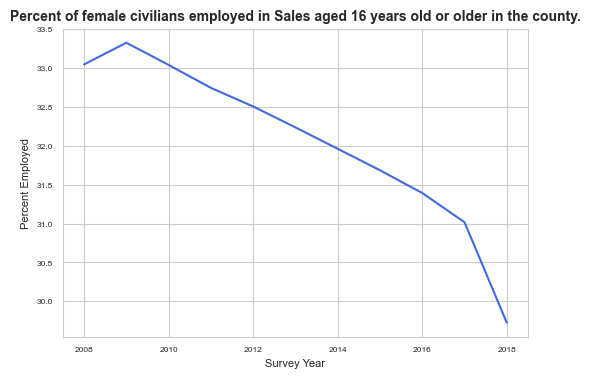

In [13]:
sns.set_style('whitegrid')
plt.figure(figsize=(6, 4))
sns.lineplot(x='study_year', y='femp_sales', data=mf_sales_service, color='royalblue')
plt.title('Percent of female civilians employed in Sales aged 16 years old or older in the county.', fontsize=10, fontweight='bold')
plt.xlabel('Survey Year', fontsize=8)
plt.ylabel('Percent Employed', fontsize=8)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.show()

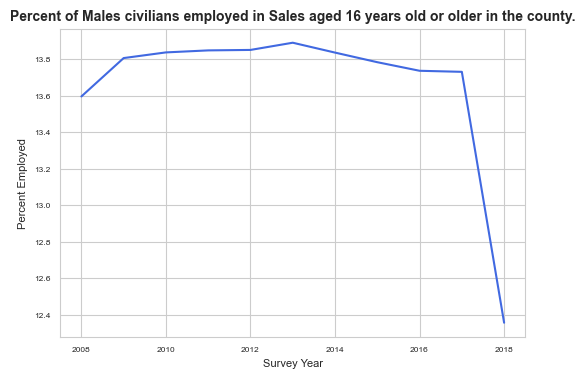

In [15]:
sns.set_style('whitegrid')
plt.figure(figsize=(6, 4))
sns.lineplot(x='study_year', y='memp_sales', data=mf_sales_service, color='royalblue')
plt.title('Percent of Males civilians employed in Sales aged 16 years old or older in the county.', fontsize=10, fontweight='bold')
plt.xlabel('Survey Year', fontsize=8)
plt.ylabel('Percent Employed', fontsize=8)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.show()

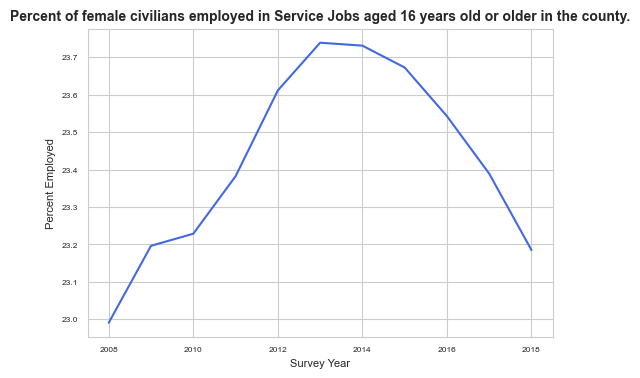

In [14]:
sns.set_style('whitegrid')
plt.figure(figsize=(6, 4))
sns.lineplot(x='study_year', y='femp_service', data=mf_sales_service, color='royalblue')
plt.title('Percent of female civilians employed in Service Jobs aged 16 years old or older in the county.', fontsize=10, fontweight='bold')
plt.xlabel('Survey Year', fontsize=8)
plt.ylabel('Percent Employed', fontsize=8)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.show()

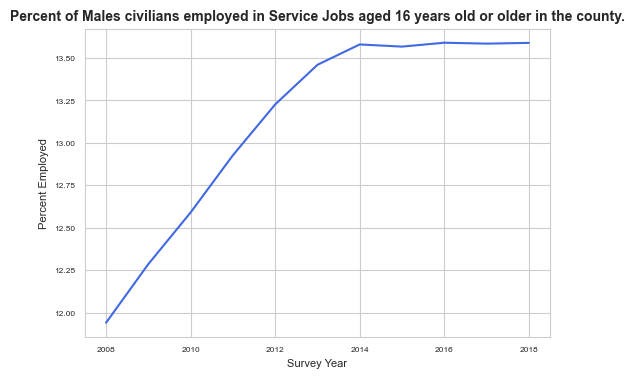

In [16]:
sns.set_style('whitegrid')
plt.figure(figsize=(6, 4))
sns.lineplot(x='study_year', y='memp_service', data=mf_sales_service, color='royalblue')
plt.title('Percent of Males civilians employed in Service Jobs aged 16 years old or older in the county.', fontsize=10, fontweight='bold')
plt.xlabel('Survey Year', fontsize=8)
plt.ylabel('Percent Employed', fontsize=8)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.show()

In [ ]:

profile = ProfileReport(mf_sales_service)